In [2]:
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer_data = load_breast_cancer()
X_train, X_test, Y_train, Y_test = train_test_split(cancer_data.data, cancer_data.target,
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
my_nn = Sequential()
my_nn.add(Dense(20, input_dim=30, activation='relu'))
my_nn.add(Dense(1, activation='sigmoid'))
my_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_nn_fitted = my_nn.fit(X_train, Y_train, epochs=100,
                         initial_epoch=0)
print(my_nn.summary())
print(my_nn.evaluate(X_test, Y_test))

Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 28.0839 - acc: 0.6596
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 6.4186 - acc: 0.3779
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 1.6664 - acc: 0.8568
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 1.0093 - acc: 0.8075
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.7865 - acc: 0.8732
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6525 - acc: 0.8779
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6204 - acc: 0.8545
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5946 - acc: 0.8944
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5144 - acc: 0.8920
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4659 - acc: 0.8850
Epoch 11/100
14/14 [==============================] - 0s 2

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/20
469/469 [==============================] - 16s 29ms/step - loss: 0.2463 - accuracy: 0.9269 - val_loss: 0.1086 - val_accuracy: 0.9657
Epoch 2/20
469/469 [==============================] - 9s 20ms/step - loss: 0.1012 - accuracy: 0.9689 - val_loss: 0.0796 - val_accuracy: 0.9754
Epoch 3/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0723 - accuracy: 0.9776 - val_loss: 0.0729 - val_accuracy: 0.9780
Epoch 4/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0552 - accuracy: 0.9826 - val_loss: 0.0686 - val_accuracy: 0.9787
Epoch 5/20
469/469 [==============================] - 15s 32ms/step - loss: 0.0452 - accuracy: 0.9852 - val_loss: 0.0685 - val_accuracy: 0.9792
Epoch 6/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0364 - accuracy: 0.9886 - val_loss: 0.0699 - val_accuracy: 0.9805
Epoch 7/20
469/469 [==============================] - 9s 19ms/step - loss:

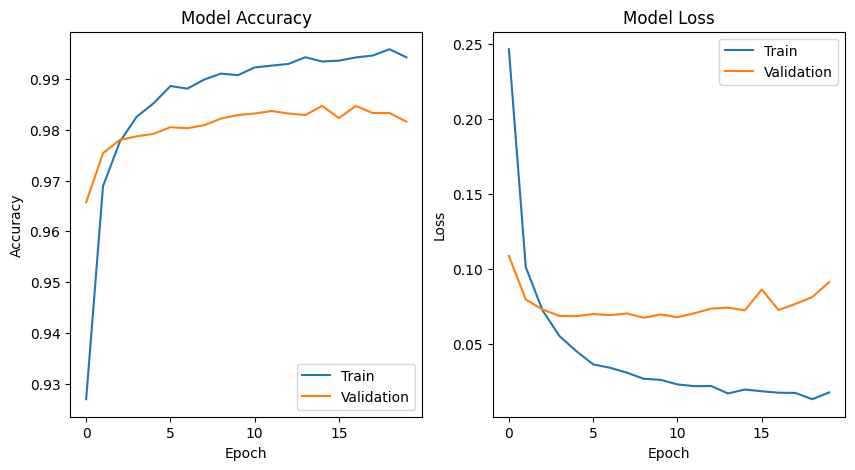

In [7]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# normalize pixel values to range [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# convert class labels to binary class matrices
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

# create a simple neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model and record the training history
history = model.fit(train_images.reshape(-1, 784), train_labels, validation_data=(test_images.reshape(-1, 784), test_labels),
                    epochs=20, batch_size=128)

# plot the training and validation accuracy and loss curves
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

Epoch 1/20
469/469 [==============================] - 13s 24ms/step - loss: 0.2476 - accuracy: 0.9247 - val_loss: 0.0940 - val_accuracy: 0.9708
Epoch 2/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0998 - accuracy: 0.9693 - val_loss: 0.0888 - val_accuracy: 0.9709
Epoch 3/20
469/469 [==============================] - 10s 20ms/step - loss: 0.0715 - accuracy: 0.9781 - val_loss: 0.0723 - val_accuracy: 0.9754
Epoch 4/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0551 - accuracy: 0.9817 - val_loss: 0.0687 - val_accuracy: 0.9781
Epoch 5/20
469/469 [==============================] - 10s 20ms/step - loss: 0.0444 - accuracy: 0.9856 - val_loss: 0.0682 - val_accuracy: 0.9806
Epoch 6/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0395 - accuracy: 0.9870 - val_loss: 0.0786 - val_accuracy: 0.9763
Epoch 7/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0346 - accuracy: 0.9888 - val_loss: 0.0573 - val_accuracy: 0.

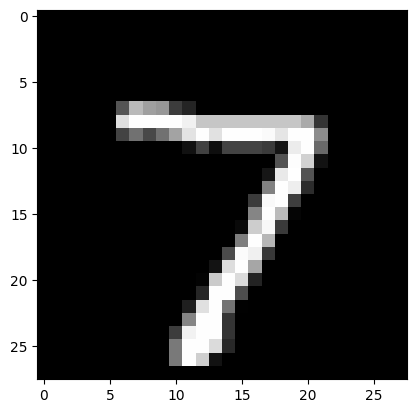

1/1 [==============================] - 0s 84ms/step
Model prediction: 7


In [8]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_images.reshape(-1, 784), train_labels, validation_data=(test_images.reshape(-1, 784), test_labels),
          epochs=20, batch_size=128)

plt.imshow(test_images[0], cmap='gray')
plt.show()
prediction = model.predict(test_images[0].reshape(1, -1))
print('Model prediction:', np.argmax(prediction))

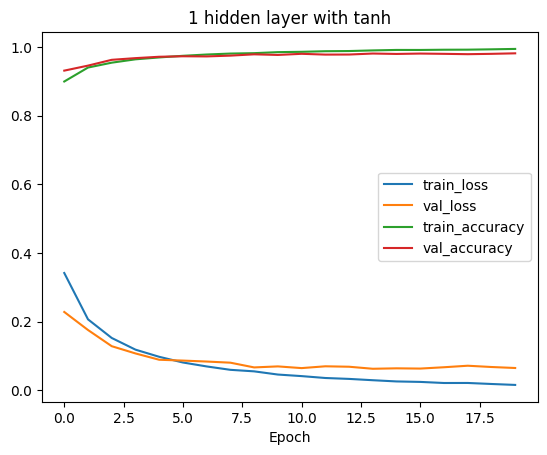

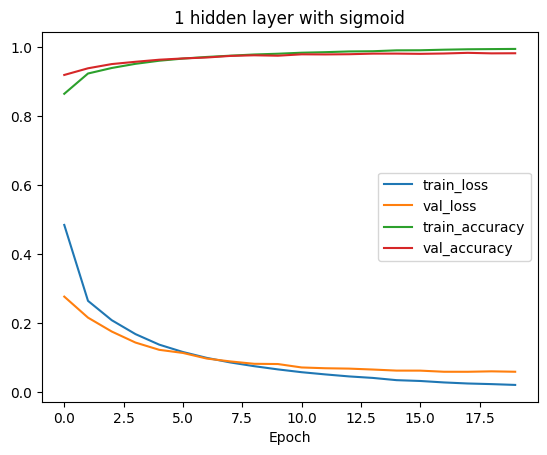

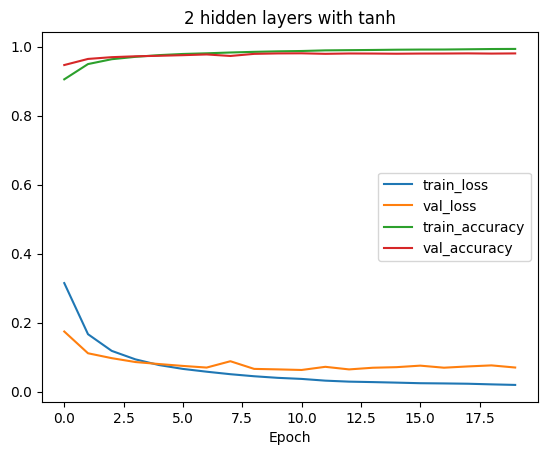

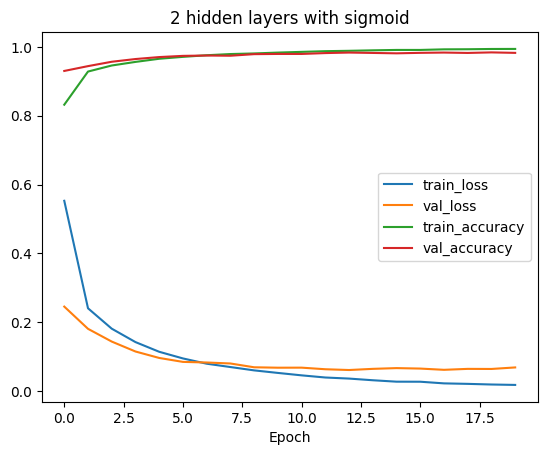

2 hidden layers with sigmoid - Test loss: 0.0686, Test accuracy: 0.9824


In [10]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

# load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# normalize pixel values to range [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# convert class labels to binary class matrices
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

# create a list of models to train
models = []

# model with 1 hidden layer and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with tanh', model))

# model with 1 hidden layer and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('1 hidden layer with sigmoid', model))

# model with 2 hidden layers and tanh activation
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with tanh', model))

# model with 2 hidden layers and sigmoid activation
model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
models.append(('2 hidden layers with sigmoid', model))

# train each model and plot loss and accuracy curves
for name, model in models:
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(train_images.reshape(-1, 784), train_labels, validation_data=(test_images.reshape(-1, 784), test_labels),
                        epochs=20, batch_size=128, verbose=0)
    # plot loss and accuracy curves
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(name)
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
loss, accuracy = model.evaluate(test_images.reshape(-1, 784), test_labels, verbose=0)
print('{} - Test loss: {:.4f}, Test accuracy: {:.4f}'.format(name, loss, accuracy))

In [6]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
sc = StandardScaler()
X_train_normalized = sc.fit_transform(X_train)
X_test_normalized = sc.transform(X_test)

# Define the model
model_normalized = Sequential()
model_normalized.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model_normalized.add(Dense(64, activation='relu'))
model_normalized.add(Dense(128, activation='relu'))
model_normalized.add(Dense(1, activation='sigmoid'))
model_normalized.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_normalized.fit(X_train_normalized, y_train, epochs=10, batch_size=32, validation_data=(X_test_normalized, y_test))

# Evaluate the model
accuracy_normalized = model_normalized.evaluate(X_test_normalized, y_test)[1]
print("Accuracy with normalization:", accuracy_normalized)


Epoch 1/10
15/15 [==============================] - 1s 17ms/step - loss: 0.4774 - accuracy: 0.8989 - val_loss: 0.2615 - val_accuracy: 0.9474
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: 0.2021 - accuracy: 0.9429 - val_loss: 0.1013 - val_accuracy: 0.9737
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 0.1210 - accuracy: 0.9560 - val_loss: 0.0709 - val_accuracy: 0.9649
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 0.0899 - accuracy: 0.9692 - val_loss: 0.0663 - val_accuracy: 0.9737
Epoch 5/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0759 - accuracy: 0.9780 - val_loss: 0.0652 - val_accuracy: 0.9649
Epoch 6/10
15/15 [==============================] - 0s 6ms/step - loss: 0.0627 - accuracy: 0.9846 - val_loss: 0.0638 - val_accuracy: 0.9737
Epoch 7/10
15/15 [==============================] - 0s 5ms/step - loss: 0.0562 - accuracy: 0.9824 - val_loss: 0.0650 - val_accuracy: 0.9649
Epoch 8/10
15/15 [=

In [1]:
import keras
import pandas
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
dataset = pd.read_csv('diabetes.csv', header=None).values
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8],
                                                    test_size=0.25, random_state=87)
np.random.seed(123)
my_first_nn = Sequential()
my_first_nn.add(Dense(20, input_dim=8, activation='relu'))
my_first_nn.add(Dense(4, activation='relu'))
my_first_nn.add(Dense(1, activation='sigmoid'))
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=25,
                                     initial_epoch=0)
print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test, Y_test))

Epoch 1/25
18/18 [==============================] - 1s 2ms/step - loss: 18.1293 - acc: 0.6597
Epoch 2/25
18/18 [==============================] - 0s 2ms/step - loss: 7.1505 - acc: 0.6233
Epoch 3/25
18/18 [==============================] - 0s 2ms/step - loss: 3.2182 - acc: 0.5139
Epoch 4/25
18/18 [==============================] - 0s 2ms/step - loss: 1.9150 - acc: 0.5469
Epoch 5/25
18/18 [==============================] - 0s 2ms/step - loss: 1.2742 - acc: 0.5538
Epoch 6/25
18/18 [==============================] - 0s 2ms/step - loss: 1.0238 - acc: 0.6337
Epoch 7/25
18/18 [==============================] - 0s 2ms/step - loss: 0.9176 - acc: 0.6580
Epoch 8/25
18/18 [==============================] - 0s 2ms/step - loss: 0.8595 - acc: 0.6788
Epoch 9/25
18/18 [==============================] - 0s 2ms/step - loss: 0.8297 - acc: 0.6597
Epoch 10/25
18/18 [==============================] - 0s 2ms/step - loss: 0.7823 - acc: 0.6684
Epoch 11/25
18/18 [==============================] - 0s 2ms/step - l